# Importing libraries

In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import os
from pandasai import Agent
from pandasai.llm import BambooLLM

# Downloading dataset

In [2]:
# !kaggle datasets download -d dem0nking/mobile-games-android-and-ios-rating-dataset

In [3]:
# with zipfile.ZipFile('mobile-games-android-and-ios-rating-dataset.zip', 'r') as file:
#     file.extractall('mobile-games-android-and-ios-rating-dataset')

# Exploring dataset

In [4]:
df = pd.read_csv('mobile-games-android-and-ios-rating-dataset/ratings.csv')
df.head()

,Game Name,Developer,Genre,Rating
0,Candy Crush Saga,King,Puzzle,4.6
1,Clash of Clans,Supercell,Strategy,4.5
2,Among Us,InnerSloth,Party,4.4
3,Pokémon GO,Niantic,Augmented Reality,4.3
4,PUBG Mobile,Tencent Games,Battle Royale,4.2


In [5]:
df.drop_duplicates('Game Name').count().iloc[0]

101

In [6]:
df.drop_duplicates('Developer').count().iloc[1]

81

In [7]:
df.drop_duplicates('Genre').count().iloc[1]

24

In [8]:
df.sort_values('Rating', ascending=False).head(10)

,Game Name,Developer,Genre,Rating
97,Hades,Supergiant Games,Action,4.9
100,The Room,Fireproof Games,Puzzle,4.8
95,Monument Valley,Ustwo Games,Puzzle,4.8
14,Minecraft,Mojang,Sandbox,4.8
99,Alto's Adventure,Noodlecake Studios,Endless Runner,4.7
96,Stardew Valley,ConcernedApe,Simulation,4.7
7,Genshin Impact,miHoYo,Action RPG,4.7
33,CSR Racing 2,NaturalMotion,Racing,4.6
92,Fishing Clash,Ten Square Games,Sports,4.6
86,Angry Birds Dream Blast,Rovio Entertainment,Puzzle,4.6


In [9]:
df.sort_values('Rating', ascending=True).head(10)

,Game Name,Developer,Genre,Rating
74,Pixel Gun 3D,Cubic Games,Action,4.1
39,State of Survival,KingsGroup Holdings,Strategy,4.1
6,Fortnite,Epic Games,Battle Royale,4.1
41,Clash of Kings,Elex Wireless,Strategy,4.1
21,Hearthstone,Blizzard Entertainment,Card,4.1
45,Forge of Empires,InnoGames,Strategy,4.1
55,Vainglory,Super Evil Megacorp,MOBA,4.1
42,Game of War - Fire Age,Machine Zone,Strategy,4.2
37,Final Fantasy XV: A New Empire,Epic Action LLC,Strategy,4.2
29,The Sims Mobile,Electronic Arts,Simulation,4.2


In [10]:
temp_df = df.groupby('Developer').agg(
    total_counts = pd.NamedAgg(column='Developer', aggfunc='count'),
    avg_rating = pd.NamedAgg(column='Rating', aggfunc='mean')
).reset_index().sort_values('total_counts', ascending=False).head(5)
temp_df

,Developer,total_counts,avg_rating
71,Supercell,5,4.480
11,Electronic Arts,4,4.325
63,Rovio Entertainment,3,4.500
80,miHoYo,2,4.650
16,First Touch Games,2,4.350


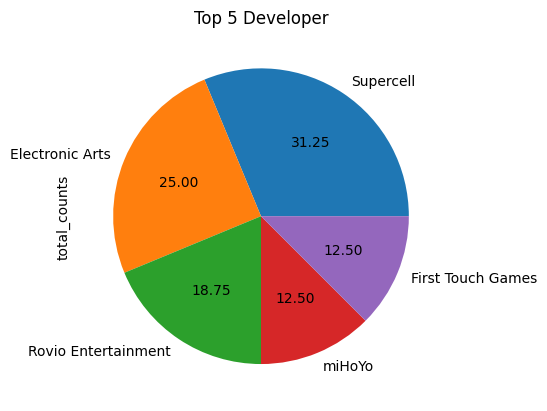

In [11]:
temp_df['total_counts'].plot(
    kind='pie',
    autopct='%.2f',
    labels=temp_df['Developer']
)
plt.title('Top 5 Developer')
plt.show()

<Axes: ylabel='Developer'>

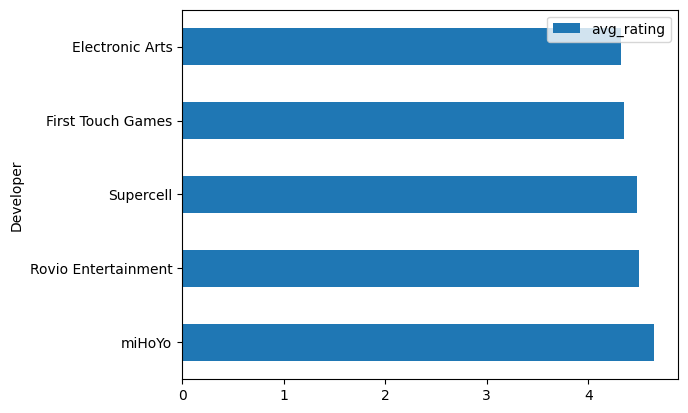

In [12]:
temp_df = temp_df.sort_values('avg_rating', ascending=False)
temp_df.plot(
    kind='barh',
    x='Developer',
    y='avg_rating'
)

In [13]:
temp_df = df.groupby('Genre').agg(
    total_counts = pd.NamedAgg(column='Genre', aggfunc='count'),
    avg_rating = pd.NamedAgg(column='Rating', aggfunc='mean')
).reset_index().sort_values('total_counts', ascending=False).head(5)
temp_df

,Genre,total_counts,avg_rating
22,Strategy,17,4.311765
20,Simulation,14,4.357143
15,Puzzle,13,4.515385
3,Arcade,10,4.420000
16,RPG,6,4.333333


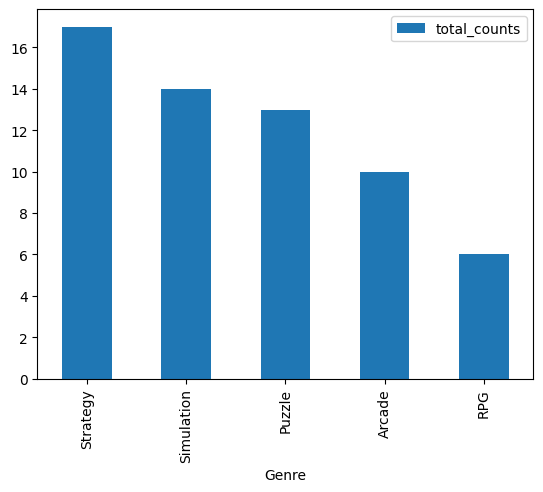

In [14]:
temp_df.plot(
    kind='bar',
    x='Genre',
    y='total_counts'
)
plt.show()

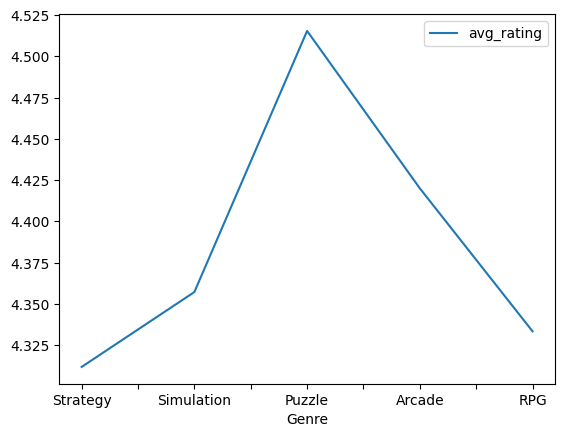

In [15]:
temp_df.plot(
    kind='line',
    x='Genre',
    y='avg_rating'
)
plt.show()

# Setting up LLM and agent

In [16]:
llm = BambooLLM(api_key=os.environ['PANDASAI_API_KEY'])

In [17]:
agent = Agent(dfs=df, config={'llm': llm, 'verbose': False, 'enforce_privacy': True, 'enable_cache': False})

# Chatting with data

In [18]:
agent.chat('how many unique games are there ?')

101

In [19]:
agent.chat('how many unique game developers are there ?')

81

In [20]:
agent.chat('how many unique game genres are there ?')

24

In [21]:
agent.chat('list down top 10 games having highest ratings')

,Game Name,Developer,Genre,Rating
97,Hades,Supergiant Games,Action,4.9
14,Minecraft,Mojang,Sandbox,4.8
95,Monument Valley,Ustwo Games,Puzzle,4.8
100,The Room,Fireproof Games,Puzzle,4.8
7,Genshin Impact,miHoYo,Action RPG,4.7
96,Stardew Valley,ConcernedApe,Simulation,4.7
99,Alto's Adventure,Noodlecake Studios,Endless Runner,4.7
0,Candy Crush Saga,King,Puzzle,4.6
15,Asphalt 9: Legends,Gameloft,Racing,4.6
33,CSR Racing 2,NaturalMotion,Racing,4.6


In [22]:
agent.chat('list down 10 games having lowest rating')

,Game Name,Developer,Genre,Rating
74,Pixel Gun 3D,Cubic Games,Action,4.1
39,State of Survival,KingsGroup Holdings,Strategy,4.1
6,Fortnite,Epic Games,Battle Royale,4.1
41,Clash of Kings,Elex Wireless,Strategy,4.1
21,Hearthstone,Blizzard Entertainment,Card,4.1
45,Forge of Empires,InnoGames,Strategy,4.1
55,Vainglory,Super Evil Megacorp,MOBA,4.1
42,Game of War - Fire Age,Machine Zone,Strategy,4.2
37,Final Fantasy XV: A New Empire,Epic Action LLC,Strategy,4.2
29,The Sims Mobile,Electronic Arts,Simulation,4.2


In [23]:
agent.chat('list down top 5 game developers based on count of games developed and avg. ratings')

,Games_Developed,Avg_Rating
Developer,,
Supercell,5,4.480
Electronic Arts,4,4.325
Rovio Entertainment,3,4.500
miHoYo,2,4.650
King,2,4.550


'd:/Projects/Python/prompt-analysis-openai/exports/charts/temp_chart.png'

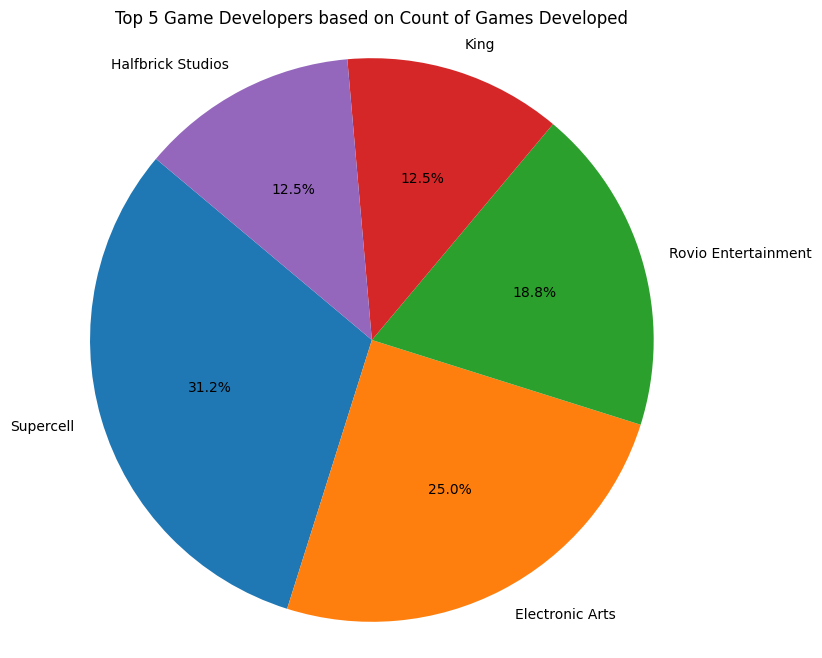

In [28]:
agent.chat('plot a single pie chart of top 5 game developers based on count of games developed')

'd:/Projects/Python/prompt-analysis-openai/exports/charts/temp_chart.png'

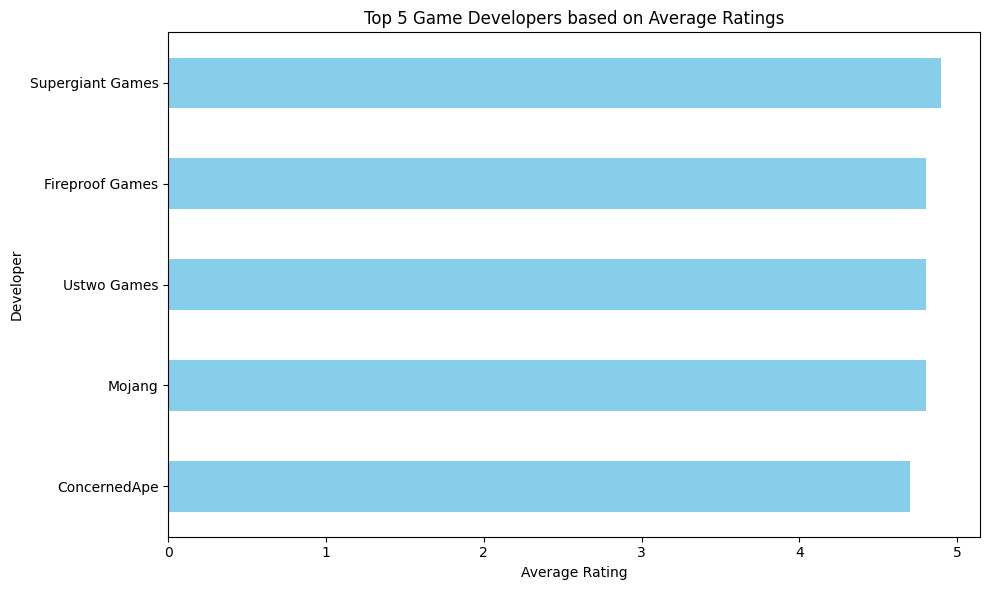

In [29]:
agent.chat('plot a horizontal bar chart of top 5 game developers based on avg. ratings')

In [26]:
agent.chat('list down a dataframe top 5 game Genre based on count of games developed and avg. ratings')

,Count of Games,Avg. Rating
Genre,,
Strategy,17,4.311765
Simulation,14,4.357143
Puzzle,13,4.515385
Arcade,10,4.420000
RPG,6,4.333333


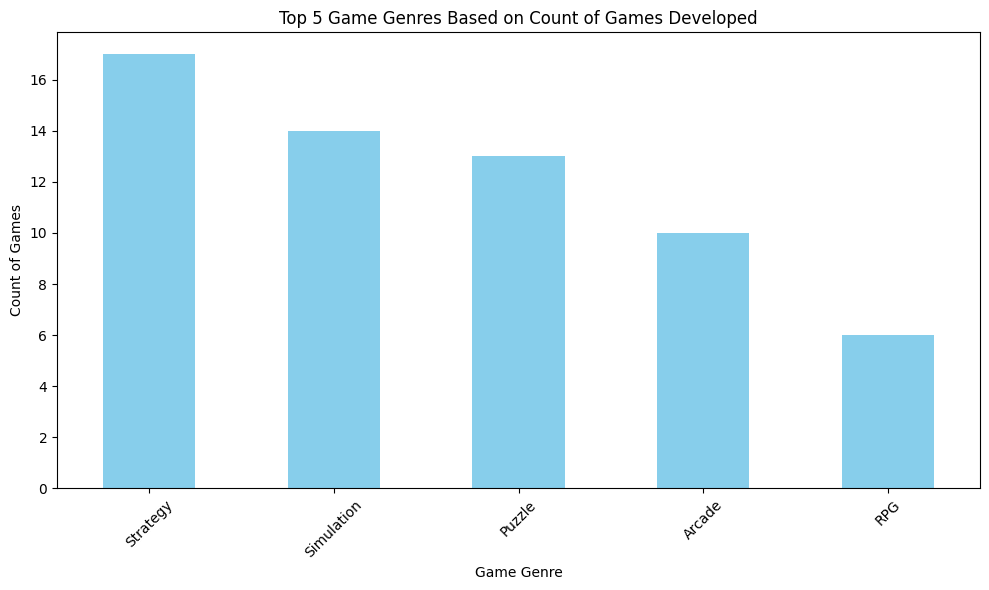

'd:/Projects/Python/prompt-analysis-openai/exports/charts/temp_chart.png'

In [30]:
agent.chat('plot a bar chart of top 5 game Genre based on count of games')

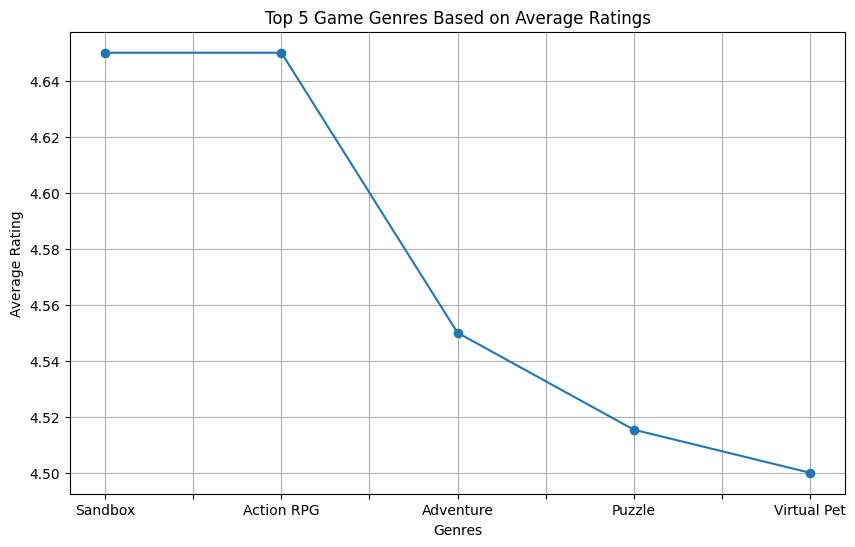

'd:/Projects/Python/prompt-analysis-openai/exports/charts/temp_chart.png'

In [31]:
agent.chat('plot a line chart of top 5 game Genre based on avg ratings')